In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

#Menyimpan Numpy Array dari source code sebelumnya

In [2]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#CNN Layer Pertama menggunakan activasi relu dan maxpooling layer

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#CNN Layer Kedua

model.add(Flatten())
model.add(Dropout(0.5))
#Layer Flatten
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#Final layer menggunakan 2 output kategori

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: 0.8466 - accuracy: 0.4667 - val_loss: 0.6900 - val_accuracy: 0.5738
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 0.6645 - accuracy: 0.6333 - val_loss: 0.7103 - val_accuracy: 0.4262
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.6904 - accuracy: 0.5417 - val_loss: 0.6813 - val_accuracy: 0.5738
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 0.6470 - accuracy: 0.6583 - val_loss: 0.6990 - val_accuracy: 0.5738
Epoch 5/20
8/8 [==============================] - 10s 1s/step - loss: 0.6132 - accuracy: 0.6667 - val_loss: 0.6224 - val_accuracy: 0.7213
Epoch 6/20
8/8 [==============================] - 10s 1s/step - loss: 0.5740 - accuracy: 0.7458 - val_loss: 0.5920 - val_accuracy: 0.6721
Epoch 7/20
8/8 [==============================] - 10s 1s/step - loss: 0.5561 - accuracy: 0.7167 - val_loss: 0.5362 - val_accuracy: 0.7705
Epoch 8/20
8/8 [====================

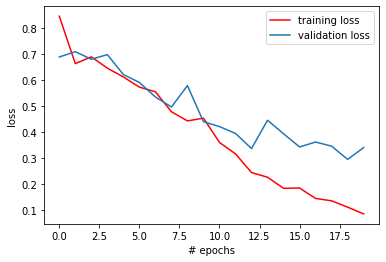

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

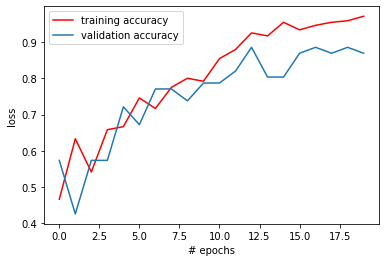

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

2/2 [==============================] - 0s 20ms/step - loss: 0.5969 - accuracy: 0.8235
[0.5969338417053223, 0.8235294222831726]
